In [41]:
import json
import torch
from transformers import BertTokenizer, BertModel
from torch.utils.data import TensorDataset, DataLoader

sentence_lis=[]
# 打开JSONL文件
with open('examples2.jsonl', 'r') as f:
    # 遍历每一行
    for line in f:
        # 解析JSON对象
        data = json.loads(line)
        # 遍历每个字典
        sentence_lis.append(data["caption_0"])
        sentence_lis.append(data["caption_1"])
print(sentence_lis[0],sentence_lis[-1])

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载BERT tokenizer和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', 
                                  gradient_checkpointing=True,
                                 output_hidden_states=True, 
                                   output_attentions=True)
                                  #cls_seq_relationship_weight=False,
                                  #cls_predictions_transform_dense_weight=False,
                                  #cls_predictions_transform_LayerNorm_weight=False,
                                  #cls_predictions_decoder_weight=False,
                                  #cls_seq_relationship_bias=False,
                                  #cls_predictions_bias=False,
                                  #cls_predictions_transform_dense_bias=False,
                                  #cls_predictions_transform_LayerNorm_bias=False)
'''model.to(device)'''

# Process training data
'''text_data = training_loader['cleantext'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(text_data, return_attention_mask=True, return_tensors='pt',padding=True,truncation=True)
input_ids = encoded_inputs['input_ids'].to(device)
attention_mask = encoded_inputs['attention_mask'].to(device)
labels =  training_loader['label'].tolist()
# Create training dataset
train_dataset = TensorDataset(input_ids, attention_mask, torch.tensor(labels,device=device))'''

# 对语料进行编码
encoded_dict = tokenizer.batch_encode_plus(
                sentence_lis,                      # 待编码的句子列表
                add_special_tokens=True,        # 添加特殊标记
                max_length=20,                  # 设置最大长度
                pad_to_max_length=True,         # 填充到最大长度
                return_attention_mask=True,     # 返回attention mask
                return_tensors='pt',         # 返回PyTorch张量
           )
print('initialze the model')
with torch.no_grad():
# 将编码结果输入BERT模型
    outputs = model(encoded_dict['input_ids'], encoded_dict['attention_mask'])
print('model finished running')
print(outputs[0],outputs[1])
output_tensor=outputs.last_hidden_state
print(output_tensor.shape)

an old person kisses a young person someone is doing it over


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max 

initialze the model
model finished running
tensor([[[-4.6980e-01, -7.0262e-02, -1.7950e-01,  ..., -5.9425e-01,
          -6.1782e-02,  7.2648e-01],
         [-1.0975e+00,  3.3036e-01, -2.9822e-01,  ..., -8.9204e-02,
          -3.7921e-01,  6.4196e-01],
         [-1.4957e-02,  1.3440e-01,  1.5617e+00,  ..., -8.5316e-02,
          -1.0064e-01, -7.5099e-02],
         ...,
         [-8.4801e-02, -1.0627e-01,  6.5195e-01,  ..., -5.9656e-01,
          -1.4972e-01,  3.6755e-01],
         [-3.8373e-01, -3.8088e-01,  5.1599e-01,  ..., -4.2659e-01,
          -4.4540e-02,  2.1065e-01],
         [-3.7208e-02, -7.2215e-02,  5.9798e-01,  ..., -4.9822e-01,
          -1.1695e-01,  2.3800e-01]],

        [[-4.1609e-01, -1.4339e-01, -1.7724e-01,  ..., -5.5626e-01,
          -1.0671e-01,  7.6768e-01],
         [-1.1489e+00,  1.8876e-01, -8.1531e-02,  ..., -4.7860e-01,
          -3.5798e-01,  5.2645e-01],
         [-4.7970e-01, -4.8129e-01,  7.8489e-01,  ..., -5.9667e-01,
          -2.5143e-01, -9.0400e-0

In [43]:
import numpy as np
import copy
#add the mask to the given tensor
#randomly pick ten percents of the entries in the third dimension to be zero
#is this way to mask the tensor reasonable?
def random_zero_tensor(x,p=0.1):
    x_1=copy.deepcopy(x)
    seed=torch.randint(0,100000,size=(1,)).item()
    print(seed)
    torch.manual_seed(seed)
    x_flatten=x_1.view(-1)
    num_zeros=int(len(x_flatten)*p)
    zero_indices=torch.randperm(len(x_flatten))[:num_zeros]
    print(zero_indices)
    x_1.view(-1)[zero_indices]=0.0
    return x_1,zero_indices


masked_tensor1,zero_indice1=random_zero_tensor(output_tensor,p=0.1)
masked_tensor2,zero_indice2=random_zero_tensor(output_tensor,p=0.1)

print(torch.sum(zero_indice1!=zero_indice2))

print(masked_tensor1.shape)
print(masked_tensor2.shape)
print(torch.sum(masked_tensor1!=masked_tensor2))
print(torch.sum(masked_tensor1==0))
print(torch.sum(masked_tensor2==0))
#print(masked_tensor1[0][0][3])
#print(masked_tensor2[0][0][3])

29194
tensor([11458213, 10591179,  3038666,  ...,  2103292, 10358424,  6244380])
68802
tensor([ 6438526,  2361444,  5869018,  ...,  9358301, 11694461,  3832401])
tensor(1228800)
torch.Size([800, 20, 768])
torch.Size([800, 20, 768])
tensor(2211960)
tensor(1228800)
tensor(1228800)


In [67]:
#define a neural network that can project a tensor of size (n,20,768) to the tensor of size(n,128)
import torch
import torch.nn as nn
class mlp(nn.Module):
    def __init__(self,input_dim1,input_dim2,output_dim):
        super(mlp,self).__init__()
        self.fc1=nn.Linear(input_dim1*input_dim2,1024)
        self.fc2=nn.Linear(1024,512)
        self.fc3=nn.Linear(512,output_dim)
        self.relu=nn.ReLU()

    def forward(self,x):
        x=x.view(x.size(0),-1)
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [68]:
#initialize the network
import torch.optim as optim
mlp=mlp(20,768,128)
optimizer=optim.Adam(mlp.parameters(),lr=1e-3)

criterion=nn.MSELoss()

n_iterations=100
batch_size=100

X_train1,X_val1=masked_tensor1[:700],masked_tensor1[700:]
X_train2,X_val2=masked_tensor2[:700],masked_tensor2[700:]



In [69]:
#train the model
train_loss_lst=np.zeros(n_iterations)
val_loss_lst=np.zeros(n_iterations)

n_batch=int(len(X_train1)/batch_size)
#print(n_batch)
for i in range(n_iterations):
    train_loss=0
    for j in range(n_batch):
        batch_start_index=j*batch_size
        X_batch_1=X_train1[batch_start_index:batch_start_index+batch_size]
        X_batch_2=X_train2[batch_start_index:batch_start_index+batch_size]

        out1=mlp(X_batch_1)
        out2=mlp(X_batch_2)

        batch_loss=criterion(out1,out2)
        #print(batch_loss)

        train_loss+=batch_loss

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    ave_train_loss=train_loss.item()/n_batch
    print(train_loss.item())
    print(ave_train_loss)
    out_val_1=mlp(X_val1)
    out_val_2=mlp(X_val2)
    val_loss=criterion(out_val_1,out_val_2)
    print('iter',i,'train loss',ave_train_loss,'valloss',val_loss.item())
    train_loss_lst[i]=ave_train_loss
    val_loss_lst[i]=val_loss

    
    
        


0.0005485783913172781
7.836834161675402e-05
iter 0 train loss 7.836834161675402e-05 valloss 1.5370151231763884e-05
0.0004435788141563535
6.33684020223362e-05
iter 1 train loss 6.33684020223362e-05 valloss 4.463771347218426e-06
9.376993693877012e-05
1.339570527696716e-05
iter 2 train loss 1.339570527696716e-05 valloss 2.2354502107191365e-06
2.3895105186966248e-05
3.4135864552808926e-06
iter 3 train loss 3.4135864552808926e-06 valloss 1.4007528079673648e-06
9.371206942887511e-06
1.3387438489839302e-06
iter 4 train loss 1.3387438489839302e-06 valloss 1.0107045227414346e-06
4.083408839505864e-06
5.833441199294092e-07
iter 5 train loss 5.833441199294092e-07 valloss 8.433118523498706e-07
1.9540439097909257e-06
2.791491299701322e-07
iter 6 train loss 2.791491299701322e-07 valloss 7.550287364210817e-07
1.0063536137749907e-06
1.437648019678558e-07
iter 7 train loss 1.437648019678558e-07 valloss 7.047510166557913e-07
5.472414841278805e-07
7.81773548754115e-08
iter 8 train loss 7.81773548754115e-

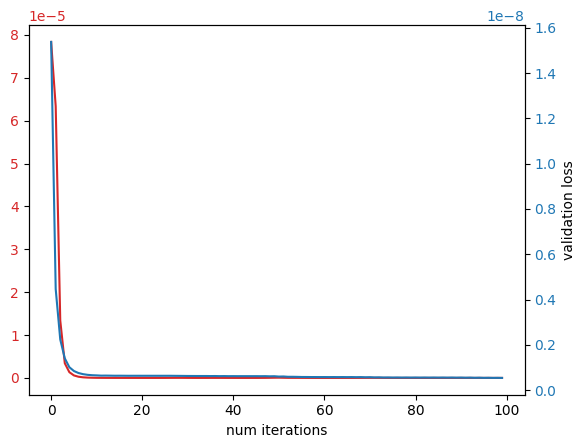

In [70]:
#plot the training versus validation
import matplotlib.pyplot as plt
x_axis=np.arange(n_iterations)

fig,ax1=plt.subplots()

color='tab:red'
ax1.set_xlabel('num iterations')
ax1.set_ylabel=('training loss')
ax1.plot(x_axis,train_loss_lst,color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2=ax1.twinx()

color='tab:blue'
ax2.set_ylabel('validation loss')
ax2.plot(x_axis,val_loss_lst/1000)
ax2.tick_params(axis='y',labelcolor=color)

plt.show()



In [72]:
#get the encoded outputs throught the projection head
mlp.eval()
encoded_prompt_tensor=mlp(output_tensor)
print(encoded_prompt_tensor.shape)
print(encoded_prompt_tensor[0])

torch.Size([800, 128])
tensor([-0.0605,  0.0388, -0.0483,  0.0157, -0.0278, -0.0248, -0.0173,  0.0291,
         0.0214,  0.0038,  0.0176, -0.0658, -0.0472, -0.0471,  0.0116,  0.0102,
         0.1105,  0.0225,  0.0371,  0.0116,  0.0080,  0.0013,  0.0028,  0.0455,
        -0.0586,  0.0453, -0.0266,  0.0494,  0.0494, -0.0741,  0.1052,  0.0100,
         0.0113, -0.0079, -0.0659, -0.0216,  0.0601, -0.0346,  0.1264, -0.0690,
        -0.0857,  0.0145, -0.0275,  0.0873,  0.0777, -0.0677, -0.0490,  0.0125,
         0.0282, -0.0456,  0.0429,  0.0081,  0.0351, -0.0012,  0.0091, -0.0213,
        -0.0038, -0.0137,  0.0410,  0.0133,  0.0041, -0.0289,  0.0193, -0.0170,
        -0.0068, -0.0754,  0.0651, -0.0156, -0.0428,  0.1056,  0.0231,  0.0038,
        -0.0466,  0.0465, -0.1112, -0.0204,  0.0413,  0.0485,  0.0229, -0.1112,
        -0.0271,  0.0324, -0.0264,  0.0168, -0.0403, -0.0342,  0.0198, -0.0515,
         0.0701, -0.0126,  0.0956,  0.0557,  0.0604,  0.0428, -0.0315,  0.0306,
        -0.0329, 